# Clean data, handle missing values, encode categorical variables, feature engineering, Split train and test sets


# 1 Clean Data


In [ ]:
pip install seaborn matplotlib pandas numpy

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load craw data from csv file
df = pd.read_csv('../data/products.csv')

In [6]:
# Check shape of the data
df.shape

(2585, 38)

In [10]:
# Check missing values and % data missing
print(df.isnull().sum() / df.shape[0] * 100)

URL                  0.000000
Price                3.326886
BOX_TYPE            10.328820
CASE_DIAMETER       11.528046
CASE_THICKNESS      44.603482
CASE_MATERIAL        8.549323
CASE_SHAPE           8.704062
CASE_BACK           21.740812
BAND_MATERIAL        5.067698
BAND_TYPE            6.034816
BAND_COLOR          13.810445
CLASP               22.707930
DIAL_COLOR          15.551257
TYPE                15.551257
CRYSTAL             18.452611
HANDS               17.911025
DIAL_MARKERS        20.193424
SECOND_MARKERS      40.464217
BEZEL               19.419729
BEZEL_COLOR         31.063830
BEZEL_MATERIAL      20.657640
BRAND               10.290135
COLLECTION_NAME     18.878143
GENDER              10.290135
MODEL               10.290135
WATCH_LABEL         30.483559
MOVEMENT            14.816248
ENGINE              47.543520
WATER_RESISTANCE    18.297872
CALENDAR            47.311412
FUNCTIONS           15.628627
WATCH_FEATURES      11.798839
WATCH_STYLE         16.866538
WARRANTY  

In [31]:
# Remove redundant columns that are not needed for analysis machine learning
cols_to_drop = ['URL', 'JOMASHOP_SKU', 'DEPARTMENT', 'CATEGORY', 'CROWN', 'WATCH_LABEL']
# Drop columns if exists
for col in cols_to_drop:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True) 
print("Còn lại các cột:")
print(df.columns.tolist())
df.to_csv('../data/products_cleaned.csv', index=False)

Còn lại các cột:
['Price', 'CASE_DIAMETER', 'CASE_THICKNESS', 'CASE_MATERIAL', 'CASE_SHAPE', 'CASE_BACK', 'BAND_MATERIAL', 'BAND_TYPE', 'BAND_COLOR', 'CLASP', 'DIAL_COLOR', 'TYPE', 'CRYSTAL', 'HANDS', 'DIAL_MARKERS', 'SECOND_MARKERS', 'BEZEL', 'BEZEL_COLOR', 'BEZEL_MATERIAL', 'BRAND', 'COLLECTION_NAME', 'GENDER', 'MODEL', 'MOVEMENT', 'ENGINE', 'WATER_RESISTANCE', 'CALENDAR', 'FUNCTIONS', 'WATCH_FEATURES', 'WATCH_STYLE', 'WARRANTY']


In [ ]:
# Save cleaned data to a new csv file
df.to_csv('../data/products_cleaned.csv', index=False)

In [32]:
# Ngưỡng 30% (threshold = 0.3): loại bỏ tất cả các cột có ≥ 30% giá trị thiếu.
# Các cột vượt ngưỡng:
# CASE_THICKNESS (44.6%)
# SECOND_MARKERS (40.5%)
# ENGINE (47.5%)
# CALENDAR (47.3%)
# CROWN (38.3%)
# CATEGORY (36.6%)
# WATCH_LABEL (30.5%)
# BEZEL_COLOR (31.1%)
# Ngưỡng 40% (threshold = 0.4): chỉ loại những cột missing ≥ 40%.
# CASE_THICKNESS, SECOND_MARKERS, ENGINE, CALENDAR
# Remove columns with more than 30% missing values
threshold = 0.3
missing_cols = df.columns[df.isnull().mean() > threshold]
print(f"Columns with more than {threshold * 100}% missing values: {missing_cols.tolist()}")
df = df.drop(columns=missing_cols)
# Save cleaned data to a new csv file
df.to_csv('../data/products_cleaned.csv', index=False)

Columns with more than 30.0% missing values: ['CASE_THICKNESS', 'SECOND_MARKERS', 'ENGINE', 'CALENDAR']


In [17]:
# Standardize price column, remove all record that missing price
df = df[df['Price'].notna() & (df['Price'].astype(str).str.strip() != '')].copy()
df['Price'] = (
    df['Price']
    .astype(str)
    .str.extract(r'([\d,]+\.?\d*)')[0]
)
df = df[df['Price'].notna()].copy()
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df.head()

,Price,BOX_TYPE,CASE_DIAMETER,CASE_THICKNESS,CASE_MATERIAL,CASE_SHAPE,CASE_BACK,BAND_MATERIAL,BAND_TYPE,BAND_COLOR,...,ENGINE,WATER_RESISTANCE,CALENDAR,FUNCTIONS,WATCH_FEATURES,WATCH_STYLE,WARRANTY,DEPARTMENT,CATEGORY,CROWN
0,534.0,Original Box,40 mm,10.9 mm,Stainless Steel,Tonneau,Transparent,Stainless Steel,Bracelet,Silver-tone,...,Powermatic 80.111,100 meters / 330 feet,Date display at the 3 o'clock position,"Date, Hour, Minute, Second","Analog, Stainless Steel",Casual,2 Year Jomashop Warranty,Watches,Watches,NaN
1,534.0,Original Box,40 mm,10.9 mm,Stainless Steel,Tonneau,Transparent,Stainless Steel,Bracelet,Silver-tone,...,Powermatic 80.111,100 meters / 330 feet,Date display at the 3 o'clock position,"Date, Hour, Minute, Second","Analog, Stainless Steel",Casual,2 Year Jomashop Warranty,Watches,Watches,NaN
2,27750.0,NaN,44 mm,NaN,Titanium,Octagon,NaN,Titanium,Bracelet,Grey,...,NaN,NaN,Date sub-dial at the 2 o'clock position,"Date, Second Time Zone, Hour, Minute, Second","Analog, Power Reserve Indicator, Titanium, Tim...",Luxury,1 Year Jomashop Warranty,Watches,Watches,NaN
3,88.0,Original Box,42 mm,14 mm,Alloy,Round,NaN,Leather,Strap,Blue,...,NaN,NaN,Date display at the 6 o'clock position,"Chronograph, Date, Hour, Minute, Second","Month, Analog, Leather, Chronograph",Casual,NaN,Watches,Watches,NaN
4,9318.0,NaN,40 mm,12 mm,Stainless Steel,Round,Solid,Stainless Steel Oyster,Bracelet,Silver-tone,...,Rolex Calibre 3186,100 meters / 330 feet,Date Display at the 3 o'clock position,"Date, GMT, Second Time Zone, Hour, Minute, Sec...","Time Zone, Stainless Steel, Analog, GMT, Chron...",Luxury,1 Year Jomashop Warranty,Watches,Watches,Screw Down


In [18]:
# Check the shape of the data after cleaning
print(f"Shape of the data after cleaning: {df.shape}")

Shape of the data after cleaning: (2499, 36)


In [19]:
# Save cleaned data to a new csv file
df.to_csv('../data/products_cleaned.csv', index=False)

## Remove all columns that only have one unique value


In [ ]:
# Print unique values in each column
unique_counts = df.nunique()
print("Unique values in each column:")
print(unique_counts)

Unique values in each column:
Price               1555
BOX_TYPE               1
CASE_DIAMETER         44
CASE_THICKNESS       274
CASE_MATERIAL        160
CASE_SHAPE            10
CASE_BACK             29
BAND_MATERIAL        268
BAND_TYPE              2
BAND_COLOR           148
CLASP                112
DIAL_COLOR           302
TYPE                   3
CRYSTAL               43
HANDS                219
DIAL_MARKERS         119
SECOND_MARKERS       214
BEZEL                 70
BEZEL_COLOR          126
BEZEL_MATERIAL       234
BRAND                168
COLLECTION_NAME     1035
GENDER                 3
MODEL               2315
WATCH_LABEL           18
MOVEMENT               4
ENGINE               646
WATER_RESISTANCE      33
CALENDAR              66
FUNCTIONS            263
WATCH_FEATURES       464
WATCH_STYLE            9
WARRANTY               8
DEPARTMENT             1
CATEGORY               6
CROWN                 61
dtype: int64


In [25]:
# Remove all columns that only have one unique value
df = df.loc[:, df.nunique() > 1]
print(f"Shape of the data after removing single unique value columns: {df.shape}")
df.to_csv('../data/products_cleaned.csv', index=False)

Shape of the data after removing single unique value columns: (2499, 34)


## Standardize Unit


In [39]:
df = pd.read_csv('../data/products_cleaned.csv')
# Standardize Unit and remove all unit
cols_with_units = {
    'CASE_THICKNESS': r'([\d\.]+)',                    # mm
}

for col, regex in cols_with_units.items():
    # 1) Extract chuỗi số phù hợp
    df[col + '_num'] = df[col].astype(str).str.extract(regex)[0]
    
    # 2) Loại dấu phẩy (nếu có) rồi ép về float
    df[col + '_num'] = df[col + '_num'].str.replace(',', '').astype(float)

# Nếu muốn đổi tên và xóa cột gốc:
for col in list(cols_with_units):
    df = df.drop(columns=[col]).rename(columns={col + '_num': col})

# Kiểm tra kết quả
print(df[['Price', 'CASE_DIAMETER', 'WATER_RESISTANCE', 'CASE_THICKNESS']].head())

     Price  CASE_DIAMETER  WATER_RESISTANCE  CASE_THICKNESS
0    534.0           40.0             100.0            10.9
1    534.0           40.0             100.0            10.9
2  27750.0           44.0               NaN             NaN
3     88.0           42.0               NaN            14.0
4   9318.0           40.0             100.0            12.0


In [40]:
df.to_csv('../data/products_cleaned.csv', index=False)

In [41]:
# Check outliers in the all columns
def detect_outliers_iqr(df, unit_regex_map=None, multiplier=1.5):
    """
    Phát hiện outlier theo phương pháp IQR trên tất cả cột số:
    - unit_regex_map: dict mapping tên cột -> regex để extract số (ví dụ r'([\d\.]+)' cho '10.9 mm').
    - multiplier: hệ số nhân IQR (thường dùng 1.5).
    Trả về DataFrame summary với Q1, Q3, IQR, bounds và số outlier.
    """
    df_clean = df.copy()
    
    # 1. Nếu có map cột chứa đơn vị, extract và ép float
    if unit_regex_map:
        for col, regex in unit_regex_map.items():
            df_clean[col] = (
                df_clean[col].astype(str)
                .str.extract(regex)[0]             # lấy nhóm số
                .str.replace(',', '')              # bỏ dấu phẩy nếu có
            )
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    # 2. Tự động chọn cột số
    num_cols = df_clean.select_dtypes(include=['number']).columns
    
    # 3. Tính IQR và đếm outliers
    summary = []
    for col in num_cols:
        series = df_clean[col].dropna()
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower, upper = q1 - multiplier * iqr, q3 + multiplier * iqr
        outlier_count = series[(series < lower) | (series > upper)].shape[0]
        
        summary.append({
            'column': col,
            'Q1': q1,
            'Q3': q3,
            'IQR': iqr,
            'lower_bound': lower,
            'upper_bound': upper,
            'outliers_count': outlier_count
        })
    
    return pd.DataFrame(summary)

# Check outliers in the all numeric columns
num_cols = df.select_dtypes(include=['number']).columns
print("Numeric columns:")
print(num_cols.tolist())

# Check outliers from num_cols
unit_regex_map = {
    'CASE_THICKNESS': r'([\d\.]+)',                    # mm
    'CASE_DIAMETER': r'([\d\.]+)',                     # mm
    'WATER_RESISTANCE': r'([\d\.]+)',                  # m
}
outlier_summary = detect_outliers_iqr(df, unit_regex_map=unit_regex_map)
print("Outlier summary:")
print(outlier_summary)

Numeric columns:
['Price', 'CASE_DIAMETER', 'WATER_RESISTANCE', 'CASE_THICKNESS']
Outlier summary:
             column     Q1      Q3     IQR  lower_bound  upper_bound  \
0             Price  159.0  8489.0  8330.0     -12336.0      20984.0   
1     CASE_DIAMETER   35.0    42.0     7.0         24.5         52.5   
2  WATER_RESISTANCE   30.0   100.0    70.0        -75.0        205.0   
3    CASE_THICKNESS    9.0    13.0     4.0          3.0         19.0   

   outliers_count  
0             355  
1              71  
2             130  
3               9  


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vulin\AppData\Local\Temp\ipykernel_18400\255355847.py:5: SyntaxWarning: invalid escape sequence '\d'
  - unit_regex_map: dict mapping tên cột -> regex để extract số (ví dụ r'([\d\.]+)' cho '10.9 mm').


# Encode Categorical Variables


In [43]:
distinct_values = df['WARRANTY'].dropna().unique()
print("Distinct values in WARRANTY column:")
print(distinct_values)

Distinct values in WARRANTY column:
['2 Year Jomashop Warranty' '1 Year Jomashop Warranty'
 'With Manufacturers Guarantee' '2 Year jomashop warranty'
 '4 Year Jomashop Warranty' '5 Year Jomashop Warranty'
 '3 Year Jomashop Warranty' "With Manufacturer's Guarantee"]


In [44]:
df.drop(columns=['WARRANTY'], inplace=True)

In [46]:
# Drop all rows that have 30% columns missing
threshold = 0.3
missing_rows = df[df.isnull().mean(axis=1) > threshold]
print(f"Rows with more than {threshold * 100}% missing values: {missing_rows.shape[0]}")
df = df.dropna(thresh=int(df.shape[1] * (1 - threshold)))
print(f"Shape of the data after dropping rows with more than {threshold * 100}% missing values: {df.shape}")
df.to_csv('../data/products_cleaned.csv', index=False)

Rows with more than 30.0% missing values: 0
Shape of the data after dropping rows with more than 30.0% missing values: (2180, 30)


C:\Users\vulin\AppData\Local\Temp\ipykernel_18400\2739239445.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')


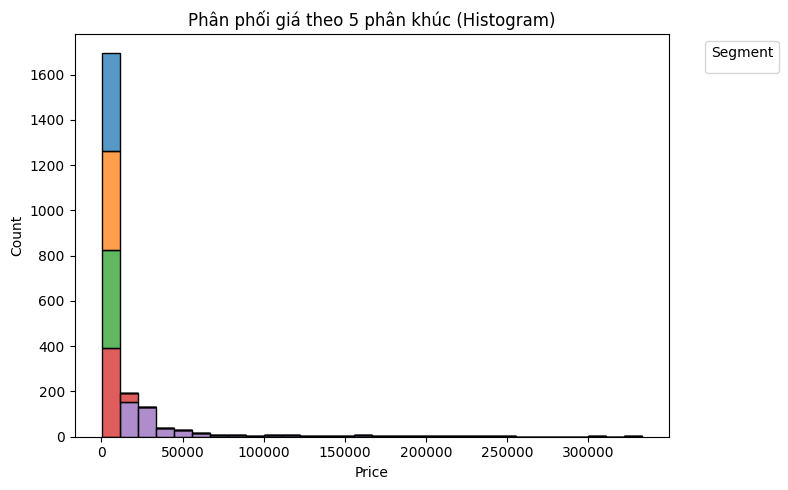

C:\Users\vulin\AppData\Local\Temp\ipykernel_18400\2739239445.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


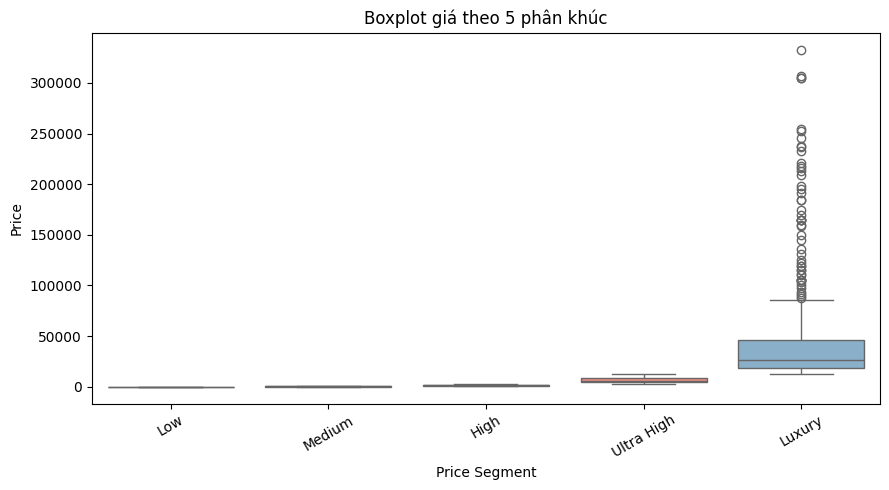

C:\Users\vulin\AppData\Local\Temp\ipykernel_18400\2739239445.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


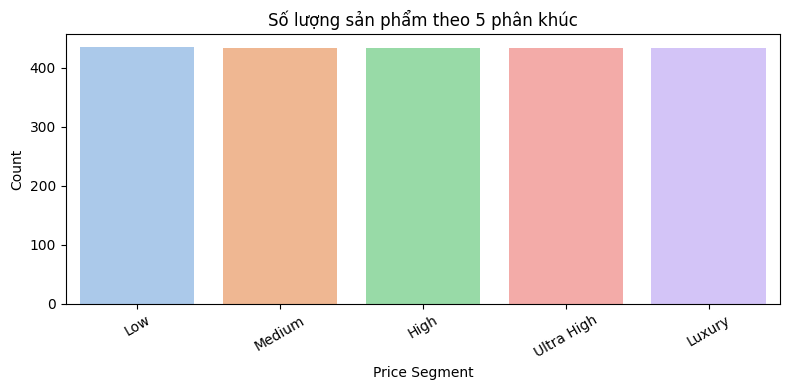

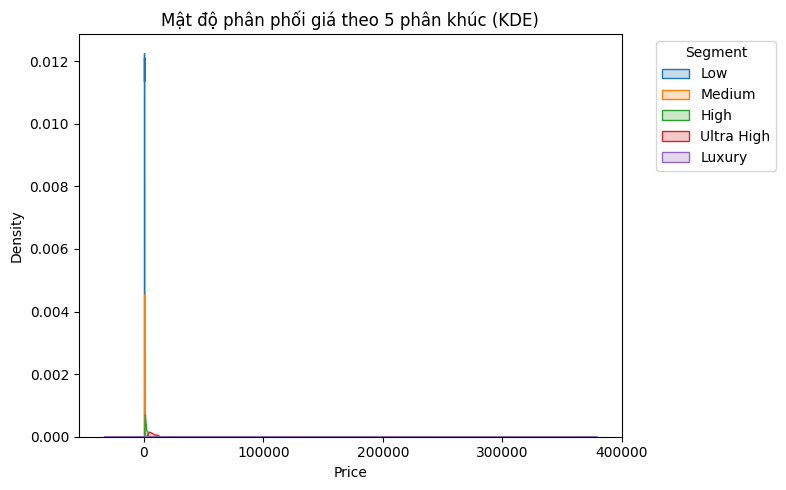

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử df đã load và đã lọc giá > 400_000
labels = ['Low', 'Medium', 'High', 'Ultra High', 'Luxury']

# q=5 để chia thành 5 nhóm
df['Price_Segment'] = pd.qcut(df['Price'], q=5, labels=labels)

# Đảm bảo thứ tự hiển thị
order = labels

# 1) Histogram
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x='Price',
    hue='Price_Segment',
    bins=30,
    palette='tab10',
    multiple='stack',
    hue_order=order
)
plt.title("Phân phối giá theo 5 phân khúc (Histogram)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2) Boxplot
plt.figure(figsize=(9, 5))
sns.boxplot(
    data=df,
    x='Price_Segment',
    y='Price',
    order=order,
    palette='Set3'
)
plt.title("Boxplot giá theo 5 phân khúc")
plt.xlabel("Price Segment")
plt.ylabel("Price")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 3) Countplot
plt.figure(figsize=(8, 4))
sns.countplot(
    data=df,
    x='Price_Segment',
    order=order,
    palette='pastel'
)
plt.title("Số lượng sản phẩm theo 5 phân khúc")
plt.xlabel("Price Segment")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 4) KDE Plot
plt.figure(figsize=(8, 5))
for seg in order:
    sns.kdeplot(
        data=df[df['Price_Segment'] == seg]['Price'],
        label=seg,
        fill=True
    )
plt.title("Mật độ phân phối giá theo 5 phân khúc (KDE)")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [64]:
total_rows = len(df)
non_missing = df['Price_Segment'].notna().sum()
missing = df['Price_Segment'].isna().sum()
print(f"Tổng dòng: {total_rows}, Có phân khúc: {non_missing}, Không gán phân khúc: {missing}")


Tổng dòng: 2168, Có phân khúc: 2168, Không gán phân khúc: 0


In [ ]:
%pip install -U scikit-learn

C:\Users\vulin\AppData\Local\Temp\ipykernel_18400\169948543.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')


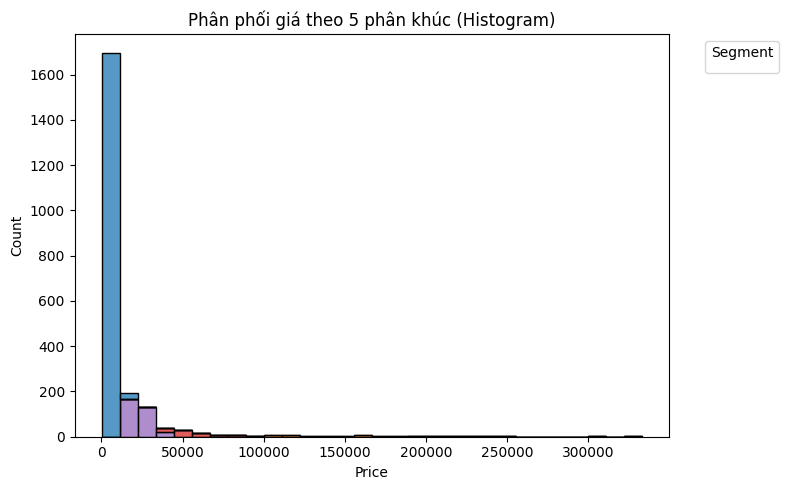

C:\Users\vulin\AppData\Local\Temp\ipykernel_18400\169948543.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


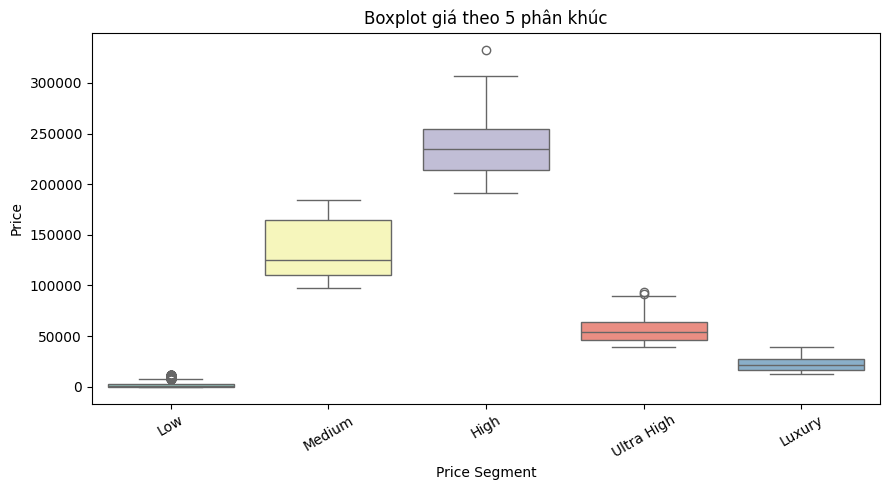

C:\Users\vulin\AppData\Local\Temp\ipykernel_18400\169948543.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


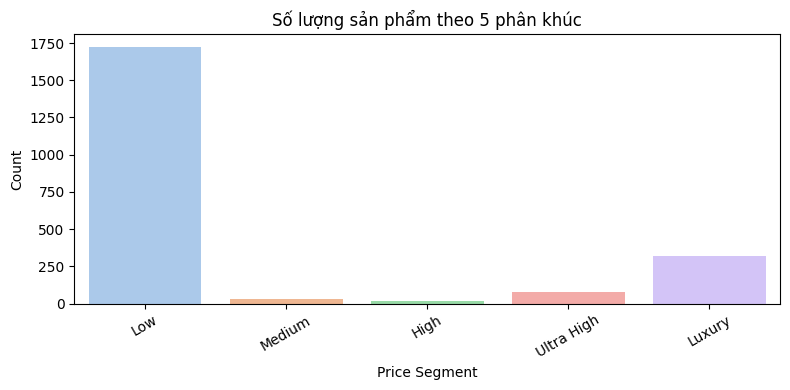

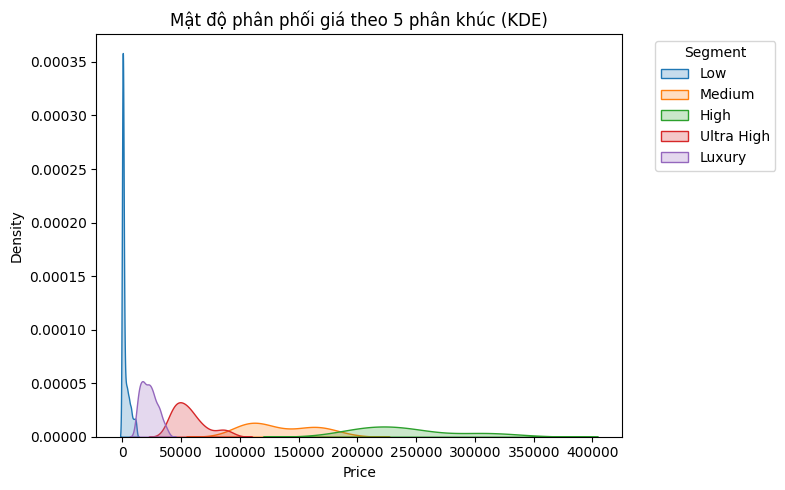

In [69]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['Price_Segment_KM'] = kmeans.fit_predict(df[['Price']])
# đổi số cluster thành nhãn nếu cần
mapping = {0:'Low',1:'Medium',2:'High',3:'Ultra High',4:'Luxury'}
df['Price_Segment_KM'] = df['Price_Segment_KM'].map(mapping)

# 1) Histogram
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x='Price',
    hue='Price_Segment_KM',
    bins=30,
    palette='tab10',
    multiple='stack',
    hue_order=order
)
plt.title("Phân phối giá theo 5 phân khúc (Histogram)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2) Boxplot
plt.figure(figsize=(9, 5))
sns.boxplot(
    data=df,
    x='Price_Segment_KM',
    y='Price',
    order=order,
    palette='Set3'
)
plt.title("Boxplot giá theo 5 phân khúc")
plt.xlabel("Price Segment")
plt.ylabel("Price")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 3) Countplot
plt.figure(figsize=(8, 4))
sns.countplot(
    data=df,
    x='Price_Segment_KM',
    order=order,
    palette='pastel'
)
plt.title("Số lượng sản phẩm theo 5 phân khúc")
plt.xlabel("Price Segment")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 4) KDE Plot
plt.figure(figsize=(8, 5))
for seg in order:
    sns.kdeplot(
        data=df[df['Price_Segment_KM'] == seg]['Price'],
        label=seg,
        fill=True
    )
plt.title("Mật độ phân phối giá theo 5 phân khúc (KDE)")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

